In [28]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import nltk
import re
import string 

import warnings
warnings.filterwarnings('ignore')

In [10]:
fakedf = pd.read_csv("Fake.csv")
realdf = pd.read_csv("True.csv")
#/kaggle/input/fake-and-real-news-dataset/

In [12]:
#Setting target class where 1=real 0=false
realdf['target'] = 1
fakedf['target'] = 0

#Concatenating both datasets for easier analysis
df = pd.concat([realdf, fakedf], ignore_index=True, sort=False)
df.head()

,title,text,subject,date,target
0,"As U.S. budget fight looms, Republicans flip t...",WASHINGTON (Reuters) - The head of a conservat...,politicsNews,"December 31, 2017",1
1,U.S. military to accept transgender recruits o...,WASHINGTON (Reuters) - Transgender people will...,politicsNews,"December 29, 2017",1
2,Senior U.S. Republican senator: 'Let Mr. Muell...,WASHINGTON (Reuters) - The special counsel inv...,politicsNews,"December 31, 2017",1
3,FBI Russia probe helped by Australian diplomat...,WASHINGTON (Reuters) - Trump campaign adviser ...,politicsNews,"December 30, 2017",1
4,Trump wants Postal Service to charge 'much mor...,SEATTLE/WASHINGTON (Reuters) - President Donal...,politicsNews,"December 29, 2017",1


Exploratory Data Analysis

In [13]:
df.isnull().sum() #checking for null values

title      0
text       0
subject    0
date       0
target     0
dtype: int64

In [15]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 44898 entries, 0 to 44897
Data columns (total 5 columns):
 #   Column   Non-Null Count  Dtype 
---  ------   --------------  ----- 
 0   title    44898 non-null  object
 1   text     44898 non-null  object
 2   subject  44898 non-null  object
 3   date     44898 non-null  object
 4   target   44898 non-null  int64 
dtypes: int64(1), object(4)
memory usage: 1.7+ MB


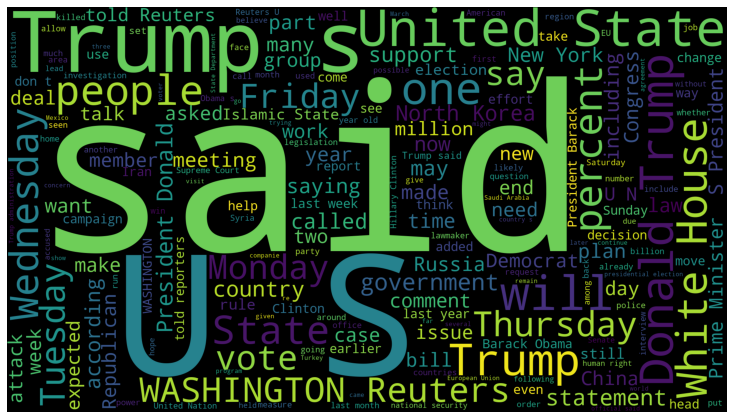

In [22]:
from wordcloud import WordCloud

realtxt = ' '.join(realdf['text'].tolist())
wordcloud_real = WordCloud(width = 1920, height = 1080,
                background_color ='black',
                min_font_size = 10).generate(realtxt)

#WordCloud Image Real                      
plt.figure(figsize = (10, 10), facecolor = None)
plt.imshow(wordcloud_real)
plt.axis("off")
plt.tight_layout(pad = 0)
plt.show()

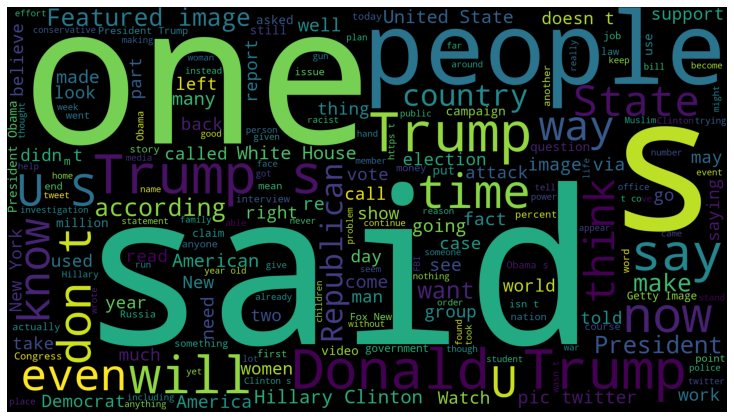

In [23]:
#WordCloud Image Fake
faketxt = ' '.join(fakedf['text'].tolist())
wordcloud_fake = WordCloud(width = 1920, height = 1080,
                background_color ='black',
                min_font_size = 10).generate(faketxt)
plt.figure(figsize = (10, 10), facecolor = None)
plt.imshow(wordcloud_fake)
plt.axis("off")
plt.tight_layout(pad = 0)
plt.show()

politicsNews       11272
worldnews          10145
News                9050
politics            6841
left-news           4459
Government News     1570
US_News              783
Middle-east          778
Name: subject, dtype: int64

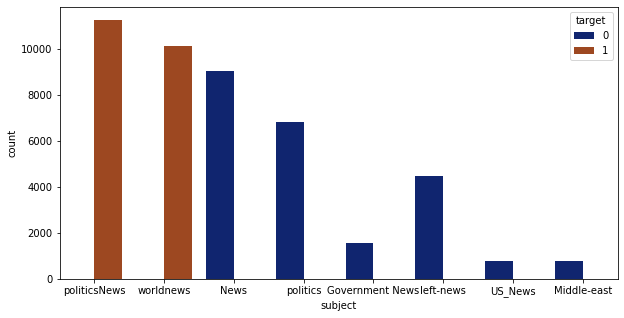

In [27]:
plt.figure(figsize=(10, 5))
sns.countplot(x="subject",  hue='target', data=df, palette="dark")
df.subject.value_counts()

0    23481
1    21417
Name: target, dtype: int64

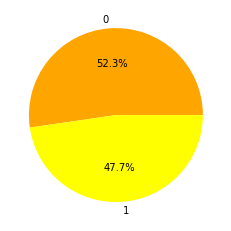

In [32]:
#Counting fake and real data
plt.pie(df["target"].value_counts().values,
        explode=[0,0],
        labels=df.target.value_counts().index, 
        autopct='%1.1f%%',
        colors=['Orange','Yellow'])
df["target"].value_counts()

In [35]:
# Extracting the year and the month 
df['date'] = pd.to_datetime(df['date'], errors='coerce')
df['Year'] = df['date'].dt.year
df['Month'] = df['date'].dt.month
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 44898 entries, 0 to 44897
Data columns (total 7 columns):
 #   Column   Non-Null Count  Dtype         
---  ------   --------------  -----         
 0   title    44898 non-null  object        
 1   text     44898 non-null  object        
 2   subject  44898 non-null  object        
 3   date     44888 non-null  datetime64[ns]
 4   target   44898 non-null  int64         
 5   Year     44888 non-null  float64       
 6   Month    44888 non-null  float64       
dtypes: datetime64[ns](1), float64(2), int64(1), object(3)
memory usage: 2.4+ MB


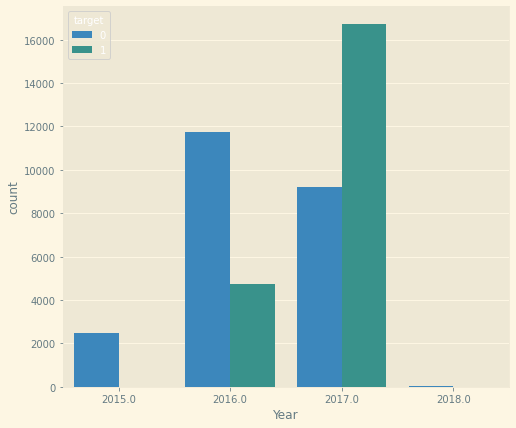

In [51]:
#Correlation betwwen year and news
plt.style.use('Solarize_Light2')
plt.figure(figsize=(8, 7))
sns.countplot(data=df, x='Year', hue='target')

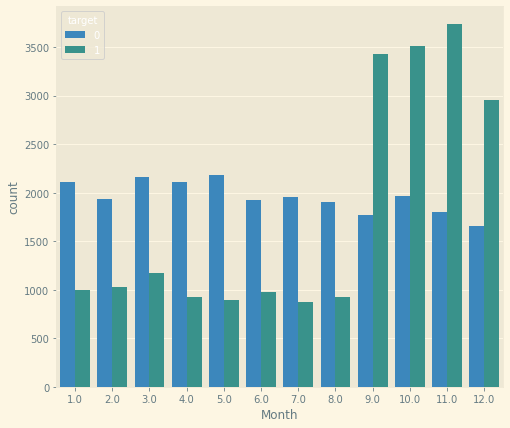

In [50]:
#Correlation between months and news
plt.style.use('Solarize_Light2')
plt.figure(figsize=(8, 7))
sns.countplot(data=df, x='Month', hue='target')

In [36]:
#Duplicating the dataset
clean_news = df.copy()

In [39]:
from nltk.corpus import stopwords 
nltk.download("stopwords") 

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


True